In [1]:
#import libr
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:

df=pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

<h2 style="color:black" > 
EDA 
<h2> 

In [5]:
left = df[df.left==1]

left.shape

(3571, 10)

In [6]:
retained = df[df.left==0]

retained.shape

(11428, 10)

In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


1.People having low satisfaction usually left organization. While those who continues to work are those having good satisfaction level. 

2.othrt reason is that people who have been working for long time do not get appraisal they deserve and hence finally the end up leaving their job amd finding new one

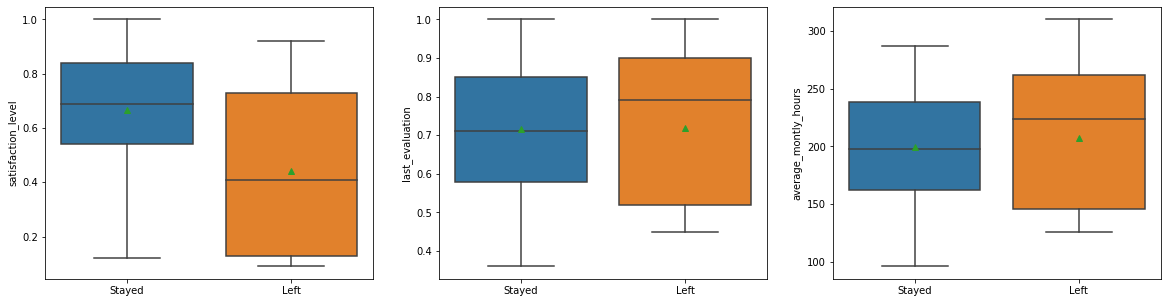

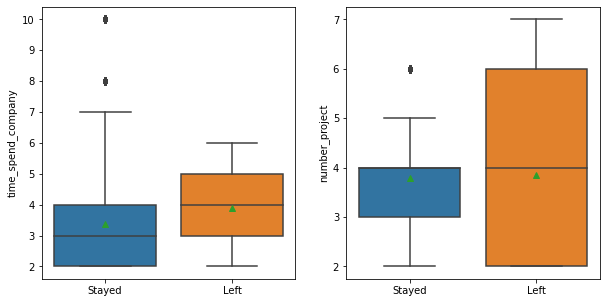

In [8]:
%matplotlib inline 

fig,ax = plt.subplots(ncols=3,figsize=(20,5))

_box=sns.boxplot(data = df,y='satisfaction_level',x='left',showmeans=True,ax=ax[0])

_box=sns.boxplot(data = df,y='last_evaluation',x='left',showmeans=True,ax=ax[1])

_box=sns.boxplot(data = df,y='average_montly_hours',x='left',showmeans=True,ax=ax[2])

for n in range(0,3):

    ax[n].set_xticklabels(labels=['Stayed','Left'])

    ax[n].set_xlabel(None)

fig,ax = plt.subplots(ncols=2,figsize=(10,5))

_box=sns.boxplot(data = df,y='time_spend_company',x='left',showmeans=True,ax=ax[0])

_box=sns.boxplot(data = df,y='number_project',x='left',showmeans=True,ax=ax[1])

for n in range(0,2):

    ax[n].set_xticklabels(labels=['Stayed','Left'])

    ax[n].set_xlabel(None)

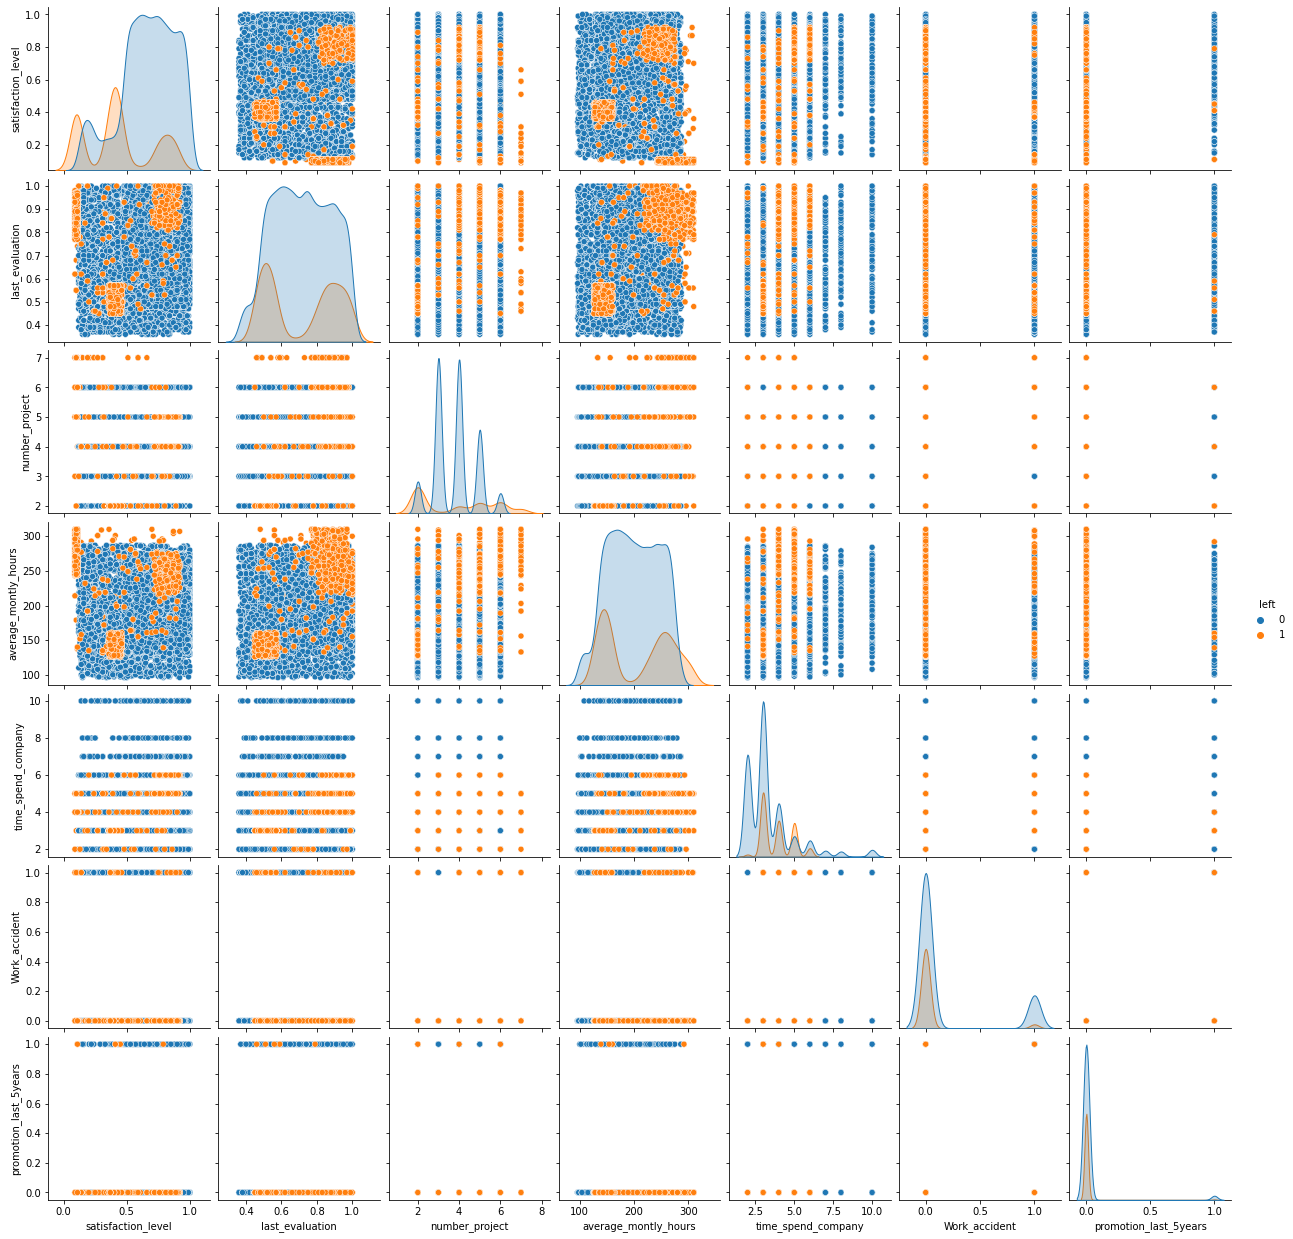

In [9]:
sns.pairplot(df, hue="left")

#### impact of all factor on employees retantion

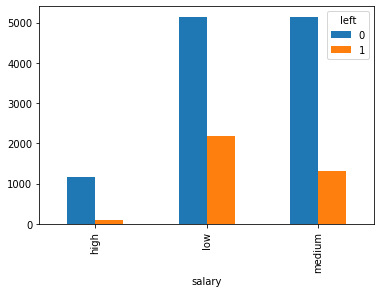

In [10]:

pd.crosstab(df.salary,df.left).plot(kind='bar')

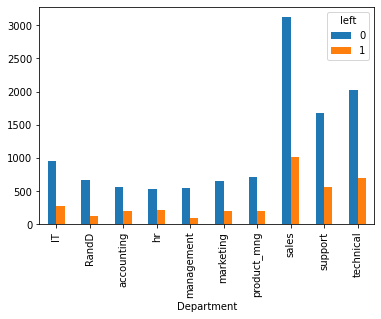

In [11]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

from above chart we can see that 
if employee salary is high then high change to 
employee doesn't leave the company 


The department in which an employee works doesn't affect on his leaving of the organization

#### conclusion

here the major factor is

 
1.satisfaction level


2.average_montly_hours


3.promotion_last_5years 

In [12]:
factor_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [13]:
factor_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


#### tackle dummy variable salary 

In [14]:
salary_dummies=pd.get_dummies(factor_df.salary,prefix="salary")

In [15]:
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [16]:
df_with_dummies=pd.concat([factor_df,salary_dummies],axis=1)

In [17]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [18]:
df_with_dummies.drop('salary',axis=1,inplace=True)

In [19]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [20]:
x=df_with_dummies
x.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [21]:
y=df.left

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2)

# model building

#### Logistics regression

In [23]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()


In [24]:
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])

In [26]:
model.score(x_test,y_test)

0.787

#### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=50)

model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [28]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])

In [29]:
model.score(x_test,y_test)

0.9145